In [1]:
import h5py
import matplotlib.pyplot as plt
from PIL import Image
from sys import getsizeof
import numpy as np
import PIL
import open3d

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
path_log = "/home/shivampr21/Research/datasets/argoverse-tracking/argov1_proc/train1/log_25952736-2595-2595-2595-225953853440.hdf5"
hf5 = h5py.File(path_log, 'r')

In [3]:
log = list(hf5.keys())
log_frame = hf5[log[0]]

In [4]:
t = list(log_frame.keys())
time_frame = log_frame[t[0]]

In [5]:
np.asarray(time_frame["timestamp"])

array(315966391619461000, dtype=uint64)

In [6]:
np.asanyarray(time_frame['det_1/cls'], dtype='str')

array('VEHICLE', dtype='<U20')

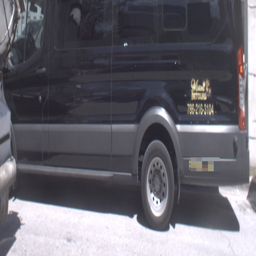

In [7]:
img = PIL.Image.fromarray(np.asarray(time_frame['det_10/img_2'], dtype=np.float32).astype('uint8'))
img

In [11]:
bbg = np.asarray(time_frame['det_10/bbox_global'], dtype=np.float32).astype('float32')
bbl = np.asarray(time_frame['det_10/bbox'], dtype=np.float32).astype('float32')
tr = np.asarray(time_frame['local_to_global_transform'], dtype=np.float32).astype('float32')
R, t = tr[:, :3], tr[:, 3]
bbltbbg = bbl @ R + t

In [13]:
point_cloud_bbg = open3d.geometry.PointCloud()
point_cloud_bbg.points = open3d.utility.Vector3dVector(bbg)
point_cloud_bbl = open3d.geometry.PointCloud()
point_cloud_bbl.points = open3d.utility.Vector3dVector(bbl)
point_cloud_bbltbbg = open3d.geometry.PointCloud()
point_cloud_bbltbbg.points = open3d.utility.Vector3dVector(bbltbbg+np.array([10, 0, 0]))
open3d.visualization.draw_geometries([point_cloud_bbltbbg, point_cloud_bbg])

In [14]:
bbg-bbltbbg

array([[-7.6293945e-06,  0.0000000e+00,  1.9073486e-06],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  1.9073486e-06],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  1.9073486e-06],
       [-7.6293945e-06,  0.0000000e+00,  1.9073486e-06],
       [-7.6293945e-06,  0.0000000e+00,  0.0000000e+00]], dtype=float32)